In [231]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os


In [232]:
data=tf.keras.utils.image_dataset_from_directory(directory=".",
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(480, 480),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear')

Found 64 files belonging to 1 classes.
Using 52 files for training.


In [233]:
valid_data = tf.keras.utils.image_dataset_from_directory(
    directory='.',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(480, 480),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear'
)

Found 64 files belonging to 1 classes.
Using 12 files for validation.


In [234]:

# CNN model Thingy :)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(480, 480, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [235]:

# Compiling time yastaaaAAAAAAAAAAAAAA
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [236]:

# Train the model (assuming 'train_data' contains your training data and labels)
acc=model.fit(data, epochs=20, validation_data=valid_data)


Epoch 1/20
2/2 [==============================] - 26s 8s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
2/2 [==============================] - 19s 9s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 23s 7s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 16s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 15s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 15s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 17s 7s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val

In [237]:
his=acc.history
his

{'loss': [0.002512325532734394,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'val_accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0]}

In [238]:
model.save('dick.keras')

In [247]:
(test_loss, test_acc)=(his['loss'],his['accuracy'])
# Evaluate the model
test_loss, test_acc = model.evaluate(valid_data)
print(f'Test accuracy: {test_acc}')


1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.0


In [248]:
from PIL import Image

In [249]:

def resize_image(input_path, output_path, size=(480, 480), format="JPEG"):
    try:
        # Open the image file
        with Image.open(input_path) as img:
            # Convert image mode to 'RGB' if it has an alpha channel
            if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
                img = img.convert('RGB')
            # Resize the image
            resized_img = img.resize(size)
            # Save the resized image
            resized_img.save(output_path, format=format)
            print(f"Image resized and saved to {output_path}")
            return resize_image
    except Exception as e:
        print(f"Error: {e}")

In [250]:
img=resize_image('penis.png','penis.jpg')

Image resized and saved to penis.jpg


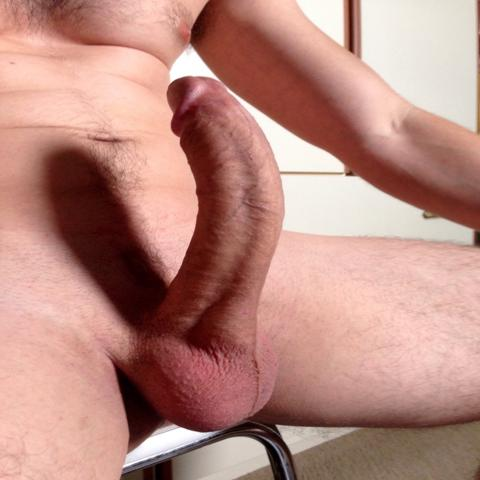

In [251]:
img=tf.keras.utils.load_img('penis.jpg')
img

In [252]:
arr=tf.keras.preprocessing.image.img_to_array(img)
arr.shape

(480, 480, 3)

In [298]:
import numpy as np
img_array = np.expand_dims(arr, axis=0)  # Add batch dimension
img_array.shape

(1, 480, 480, 3)

In [310]:
model.predict(tf.keras.utils.image_dataset_from_directory('.',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(480, 480),
    shuffle=True,
    seed=42,
    interpolation='bilinear')).any()==1.0

Found 64 files belonging to 1 classes.
2/2 [==============================] - 4s 2s/step


False